### Проект "Тинькофф Квест"

Выполнил: Низов Александр

Для того чтобы отслеживать, как выглядит путь клиента от знакомства с продуктом до его получения, и какие в нем есть проблемные места, аналитики часто строят воронки. Этот инструмент позволяет понять, сколько клиентов "теряется" на каждом из этапов процесса и сколько в итоге совершает целевое действие.

Перед вами схема данных проекта Тинькофф квест. Постройте воронку, которая показывала бы в динамике по неделям и месяцам, сколько клиентов посещает наш сайт, и какая доля из них регистрируется на нем \ подает заявку на игру \ по факту приходит на нее. Количество клиентов и конверсии необходимо изобразить на одном графике.

Какие выводы можно сделать исходя из построенной воронки, какие точки роста продукта вы видите?

In [298]:
import psycopg2
import pandas as pd
import numpy as np

In [299]:
conn = psycopg2.connect(
    host="158.160.52.106",
    port=5432,
    database="postgres",
    user="student",
    password="JvLda93aA",
)
cur = conn.cursor()

cur.execute("SELECT * FROM msu_analytics.game")

data = cur.fetchall()


In [300]:
game = pd.read_sql("SELECT * FROM msu_analytics.game", conn)

/var/folders/9h/pbyzzfvn6js9818n2bx56jl80000gn/T/ipykernel_31299/954025488.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  game = pd.read_sql("SELECT * FROM msu_analytics.game", conn)


In [301]:
account = pd.read_sql("SELECT * FROM msu_analytics.account", conn)

/var/folders/9h/pbyzzfvn6js9818n2bx56jl80000gn/T/ipykernel_31299/4003572256.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  account = pd.read_sql("SELECT * FROM msu_analytics.account", conn)


In [302]:
application = pd.read_sql("SELECT * FROM msu_analytics.application", conn)

/var/folders/9h/pbyzzfvn6js9818n2bx56jl80000gn/T/ipykernel_31299/3845695487.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  application = pd.read_sql("SELECT * FROM msu_analytics.application", conn)


In [303]:
client = pd.read_sql("SELECT * FROM msu_analytics.client", conn)

/var/folders/9h/pbyzzfvn6js9818n2bx56jl80000gn/T/ipykernel_31299/3099307749.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  client = pd.read_sql("SELECT * FROM msu_analytics.client", conn)


In [304]:
client.head() #Информация о клиентах, посетивших наш сайт


,client_rk,first_name,last_name,phone_num,visit_dttm
0,16,Мальвина,Ширяева,+79644269012,2023-02-01 03:22:06.635814
1,80,Дан,Чернов,+79678859364,2022-11-23 19:27:02.644454
2,96,Вениамин,Шаров,+79633834041,2022-10-08 05:18:55.902724
3,144,Валерия,Кошелева,+79661419813,2023-01-08 17:15:49.079516
4,267,Ирина,Хохлова,+79024071127,2022-11-16 17:26:44.455402


In [305]:
account.head() #Информация об аккаунтах клиентов (данные о зарегистрированных аккаунтах на сайте)

,account_rk,client_rk,registration_dttm,login,password,email
0,16,1387,2022-10-09 00:09:48.974718,ulana77,ebRhNTfbzE,ulana7798@example.com
1,32,3114,2022-12-31 05:54:02.644344,emma.evseeva,ilu6HOBq,emma.evseeva75@example.com
2,48,2072,2022-12-22 18:00:16.294460,kopylov.vitalij,vOwNCCmvN,kopylov.vitalij47@example.org
3,64,1564,2022-09-26 17:42:12.914056,tit84,Zl7yhqjS2,tit8468@example.com
4,80,3846,2022-12-31 03:23:12.032120,subbotin.dominika,PX5KE36co5,subbotin.dominika36@example.org


In [306]:
application.head() #Информация о заявках клиентов на игры

,application_rk,account_rk,game_rk,application_dttm
0,29,698,418,2022-10-15 14:04:05.072029
1,450,746,148,2022-11-25 09:44:32.116949
2,466,853,380,2022-10-11 15:44:01.574969
3,253,531,32,2022-10-08 03:59:42.419636
4,258,454,59,2023-01-28 16:46:24.087882


In [307]:
game.head() #Расписание запланированных и состаявшихся игр

,game_rk,quest_rk,employee_rk,game_dttm,price,game_flg,finish_flg,time
0,9,24,4,2022-12-07 03:35:01.504956,1801.54,1,1,16:50:33
1,41,14,10,2023-01-24 00:50:38.029468,1996.72,1,1,04:35:40
2,57,29,8,2022-12-30 01:27:43.771770,2742.21,1,0,04:00:22
3,73,14,10,2022-11-26 12:23:44.323394,1935.05,1,0,06:49:44
4,105,24,16,2023-01-21 19:20:42.404956,1158.44,1,0,20:50:49


#### Месячная и недельная динамика конверсий

Подготовим данные для дальнейших преобразований:

In [308]:
#Для месячной динамики
client["month"] = client["visit_dttm"].dt.to_period("M")
account["month"] = account["registration_dttm"].dt.to_period("M")
application["month"] = application["application_dttm"].dt.to_period("M")
game["month"] = game["game_dttm"].dt.to_period("M")

client.head()

,client_rk,first_name,last_name,phone_num,visit_dttm,month
0,16,Мальвина,Ширяева,+79644269012,2023-02-01 03:22:06.635814,2023-02
1,80,Дан,Чернов,+79678859364,2022-11-23 19:27:02.644454,2022-11
2,96,Вениамин,Шаров,+79633834041,2022-10-08 05:18:55.902724,2022-10
3,144,Валерия,Кошелева,+79661419813,2023-01-08 17:15:49.079516,2023-01
4,267,Ирина,Хохлова,+79024071127,2022-11-16 17:26:44.455402,2022-11


In [309]:
#Для недельной динамики
client["week"] = client["visit_dttm"].dt.to_period("W")
account["week"] = account["registration_dttm"].dt.to_period("W")
application["week"] = application["application_dttm"].dt.to_period("W")
game["week"] = game["game_dttm"].dt.to_period("W")

client.head()

,client_rk,first_name,last_name,phone_num,visit_dttm,month,week
0,16,Мальвина,Ширяева,+79644269012,2023-02-01 03:22:06.635814,2023-02,2023-01-30/2023-02-05
1,80,Дан,Чернов,+79678859364,2022-11-23 19:27:02.644454,2022-11,2022-11-21/2022-11-27
2,96,Вениамин,Шаров,+79633834041,2022-10-08 05:18:55.902724,2022-10,2022-10-03/2022-10-09
3,144,Валерия,Кошелева,+79661419813,2023-01-08 17:15:49.079516,2023-01,2023-01-02/2023-01-08
4,267,Ирина,Хохлова,+79024071127,2022-11-16 17:26:44.455402,2022-11,2022-11-14/2022-11-20


Напишем функцию, которая возвращает таблицу, где первый столбец — столбец периодов (месяц/неделя), а второй — количество клиентов, соответствующих этому периоду на конкретном этапе воронки:

In [310]:
def make_count_df(column, period_str, column_str):
    arr = sorted(column.value_counts().to_dict().items()) #возвращает отсортированный по ключам массив кортежей вида (период, число клиентов)
    week_list = []
    count_list = []
    for i in range(len(arr)):
        week_list.append(str(arr[i][0]))
        count_list.append(arr[i][1])
    df = pd.DataFrame(columns = [period_str, column_str])
    df[period_str] = week_list
    df[column_str] = count_list
    return df

In [311]:
month_client_count = make_count_df(client["month"], "month", "client")
month_account_count = make_count_df(account["month"], "month", "account")
month_application_count = make_count_df(application["month"], "month", "application")
month_game_count = make_count_df(game[game["game_flg"] == 1]["month"], "month", "game") #game_flg=1, т.к. считаем только состоявшиеся игры

month_client_count

,month,client
0,2022-09,778
1,2022-10,843
2,2022-11,786
3,2022-12,805
4,2023-01,852
5,2023-02,32


In [312]:
week_client_count = make_count_df(client["week"], "week", "client")
week_account_count = make_count_df(account["week"], "week", "account")
week_application_count = make_count_df(application["week"], "week", "application")
week_game_count = make_count_df(game[game["game_flg"] == 1]["week"], "week", "game") #game_flg=1, т.к. считаем только состоявшиеся игры

week_client_count.head()

,week,client
0,2022-08-29/2022-09-04,111
1,2022-09-05/2022-09-11,184
2,2022-09-12/2022-09-18,167
3,2022-09-19/2022-09-25,181
4,2022-09-26/2022-10-02,195


Сформируем таблицы для месячной и недельной динамики, чтобы далее считать конверсии

In [313]:
#Таблица для месячной динамики
month_df = month_client_count.merge(month_account_count, on='month')
month_df = month_df.merge(month_application_count, on='month')
month_df = month_df.merge(month_game_count, on='month')
month_df

,month,client,account,application,game
0,2022-09,778,186,63,2
1,2022-10,843,219,109,21
2,2022-11,786,195,107,43
3,2022-12,805,200,97,47
4,2023-01,852,215,133,63
5,2023-02,32,9,3,3


In [314]:
#Последняя строчка – выброс ввиду того, что февраль 2023 года охвачен статистикой не полностью. Удалим её:
month_df.drop(labels = [5], axis = 0, inplace=True)

In [315]:
#Таблица для понедельной динамики
week_df = week_client_count.merge(week_account_count, on='week')
week_df = week_df.merge(week_application_count, on='week')
week_df = week_df.merge(week_game_count, on='week')
week_df

,week,client,account,application,game
0,2022-09-12/2022-09-18,167,42,17,1
1,2022-09-19/2022-09-25,181,46,24,1
2,2022-09-26/2022-10-02,195,56,18,1
3,2022-10-03/2022-10-09,204,59,33,5
4,2022-10-10/2022-10-16,190,46,28,3
5,2022-10-17/2022-10-23,171,42,24,5
6,2022-10-24/2022-10-30,189,48,18,7
7,2022-10-31/2022-11-06,197,46,25,8
8,2022-11-07/2022-11-13,173,43,30,10
9,2022-11-14/2022-11-20,179,36,25,7


In [316]:
#Последняя строчка – выброс ввиду того, что первая неделя февраля 2023 года охвачена статистикой не полностью. Удалим её:
week_df.drop(labels = [20], axis = 0, inplace=True)

#### Шаг №1. Расчёт общей конверсии воронки продаж — доля клиентов, дошедших до последнего этапа (win rate)

In [317]:
#Месячная динамика

month_df['win_rate(%)'] = round(month_df['game']/month_df['client']*100, 1)
month_df

,month,client,account,application,game,win_rate(%)
0,2022-09,778,186,63,2,0.3
1,2022-10,843,219,109,21,2.5
2,2022-11,786,195,107,43,5.5
3,2022-12,805,200,97,47,5.8
4,2023-01,852,215,133,63,7.4


In [318]:
#Недельная динамика

week_df['win_rate(%)'] = round(week_df['game']/week_df['client']*100, 1)
week_df

,week,client,account,application,game,win_rate(%)
0,2022-09-12/2022-09-18,167,42,17,1,0.6
1,2022-09-19/2022-09-25,181,46,24,1,0.6
2,2022-09-26/2022-10-02,195,56,18,1,0.5
3,2022-10-03/2022-10-09,204,59,33,5,2.5
4,2022-10-10/2022-10-16,190,46,28,3,1.6
5,2022-10-17/2022-10-23,171,42,24,5,2.9
6,2022-10-24/2022-10-30,189,48,18,7,3.7
7,2022-10-31/2022-11-06,197,46,25,8,4.1
8,2022-11-07/2022-11-13,173,43,30,10,5.8
9,2022-11-14/2022-11-20,179,36,25,7,3.9


Визуализация общей конверсии воронки продаж для месячной и недельной динамики

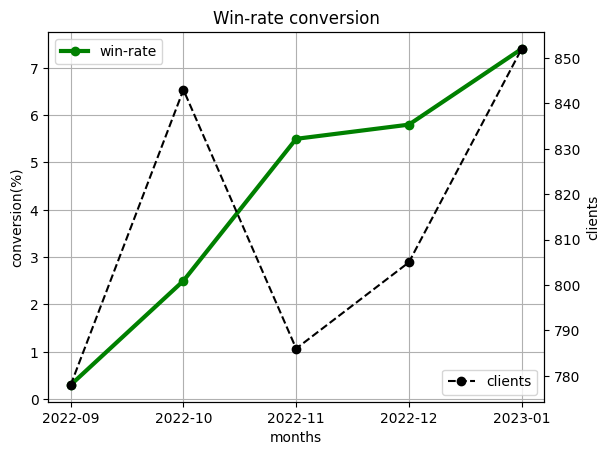

In [344]:
import matplotlib.pyplot as plt

#Динамика общей конверсии по месяцам:

fig, ax = plt.subplots()

ax.plot(month_df["month"], month_df['win_rate(%)'], color='g', marker='o', linewidth=3)
ax.set_xlabel('months')
ax.set_ylabel('conversion(%)')
ax.set_title("Win-rate conversion")
ax.legend(['win-rate'])
ax.grid()

ax2 = ax.twinx()
ax2.plot(month_df["month"], month_df["client"], linestyle='--', color='k', marker='o')
ax2.set_ylabel('clients')
ax2.legend(['clients'], loc='lower right')

plt.show()

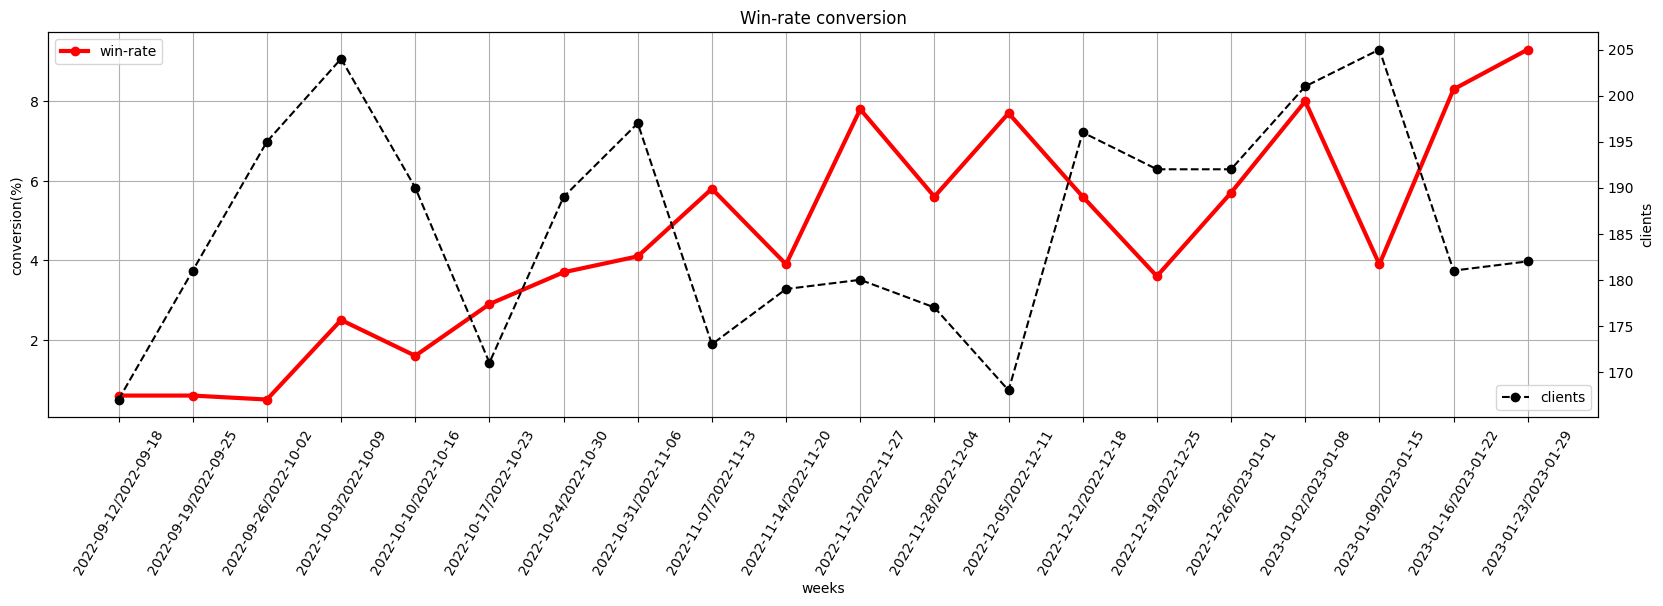

In [345]:
#Динамика общей конверсии по неделям:

fig, ax = plt.subplots(figsize=(20, 5))

ax.plot(week_df["week"], week_df['win_rate(%)'], color='r', marker='o', linewidth=3)
plt.xticks(week_df["week"], rotation=60, fontsize=10)
ax.set_xlabel('weeks')
ax.set_ylabel('conversion(%)')
ax.set_title("Win-rate conversion")
ax.legend(['win-rate'])
ax.grid()

ax2 = ax.twinx()
ax2.plot(week_df["week"], week_df["client"], linestyle='--', color='k', marker='o')
ax2.set_ylabel('clients')
ax2.legend(['clients'], loc='lower right')

plt.show()

Выводы:

В ноябре был зафиксирован спад числа посетителей сайта по сравнению с прошлыми месяцами, но к концу января 2023 года пиковый показатель восстановил прежние значения и превысил пиковое значение октября 2022 года. Конверсия посетителей сайта в количество сыгранных игр растёт каждый месяц.

График недельной динамики не имеет чёткой тенденции. Можно отметить резкое увеличение посетителей сайта с 5 по 11 декабря 2022 года — можно предположить, что клиенты Тинькофф интересуются продуктом "Тинькофф Квеста" при подготовке к праздникам — проверив эту гипотезу, можно ввести в продажу подарочные сертификаты от Тинькофф.

#### Шаг №2. Расчёт поэтапной конверсии воронки продаж

In [321]:
#Месячная динамика

#Конверсия этапа "количество посетителей сайта -> количество регистраций на сайте"
month_df['client-account(%)'] = round(month_df['account']/month_df['client']*100, 1)

#Конверсия этапа "количество регистраций на сайте -> количество заявок на игру"
month_df['account-application(%)'] = round(month_df['application']/month_df['account']*100, 1)

#Конверсия этапа "количество заявок на игру -> количество сыгранных игр"
month_df['application-game(%)'] = round(month_df['game']/month_df['application']*100, 1)

month_df

,month,client,account,application,game,win_rate(%),client-account(%),account-application(%),application-game(%)
0,2022-09,778,186,63,2,0.3,23.9,33.9,3.2
1,2022-10,843,219,109,21,2.5,26.0,49.8,19.3
2,2022-11,786,195,107,43,5.5,24.8,54.9,40.2
3,2022-12,805,200,97,47,5.8,24.8,48.5,48.5
4,2023-01,852,215,133,63,7.4,25.2,61.9,47.4


In [322]:
#Недельная динамика

#Конверсия этапа "количество посетителей сайта -> количество регистраций на сайте"
week_df['client-account(%)'] = round(week_df['account']/week_df['client']*100, 1)

#Конверсия этапа "количество регистраций на сайте -> количество заявок на игру"
week_df['account-application(%)'] = round(week_df['application']/week_df['account']*100, 1)

#Конверсия этапа "количество заявок на игру -> количество сыгранных игр"
week_df['application-game(%)'] = round(week_df['game']/week_df['application']*100, 1)

week_df.head()

,week,client,account,application,game,win_rate(%),client-account(%),account-application(%),application-game(%)
0,2022-09-12/2022-09-18,167,42,17,1,0.6,25.1,40.5,5.9
1,2022-09-19/2022-09-25,181,46,24,1,0.6,25.4,52.2,4.2
2,2022-09-26/2022-10-02,195,56,18,1,0.5,28.7,32.1,5.6
3,2022-10-03/2022-10-09,204,59,33,5,2.5,28.9,55.9,15.2
4,2022-10-10/2022-10-16,190,46,28,3,1.6,24.2,60.9,10.7


Визуализация поэтапной конверсии воронки продаж для месячной и недельной динамики

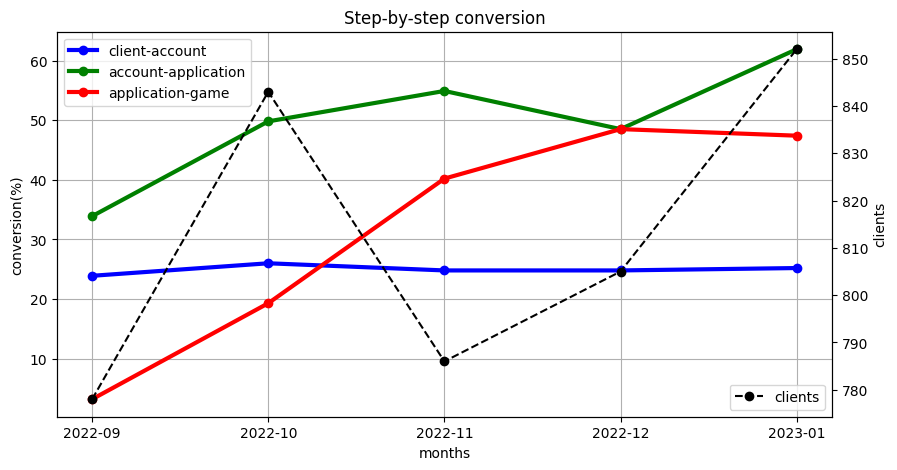

In [350]:
#Месячная динамика

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(month_df["month"], month_df['client-account(%)'], color='b', marker='o', linewidth=3)
ax.plot(month_df["month"], month_df['account-application(%)'], color='g', marker='o', linewidth=3)
ax.plot(month_df["month"], month_df['application-game(%)'], color='r', marker='o', linewidth=3)

ax.set_xlabel('months')
ax.set_ylabel('conversion(%)')
ax.set_title("Step-by-step conversion")
ax.legend(['client-account', 'account-application', 'application-game'])
ax.grid()

ax2 = ax.twinx()
ax2.plot(month_df["month"], month_df["client"], linestyle='--', color='k', marker='o')
ax2.set_ylabel('clients')
ax2.legend(['clients'], loc='lower right')

plt.show()

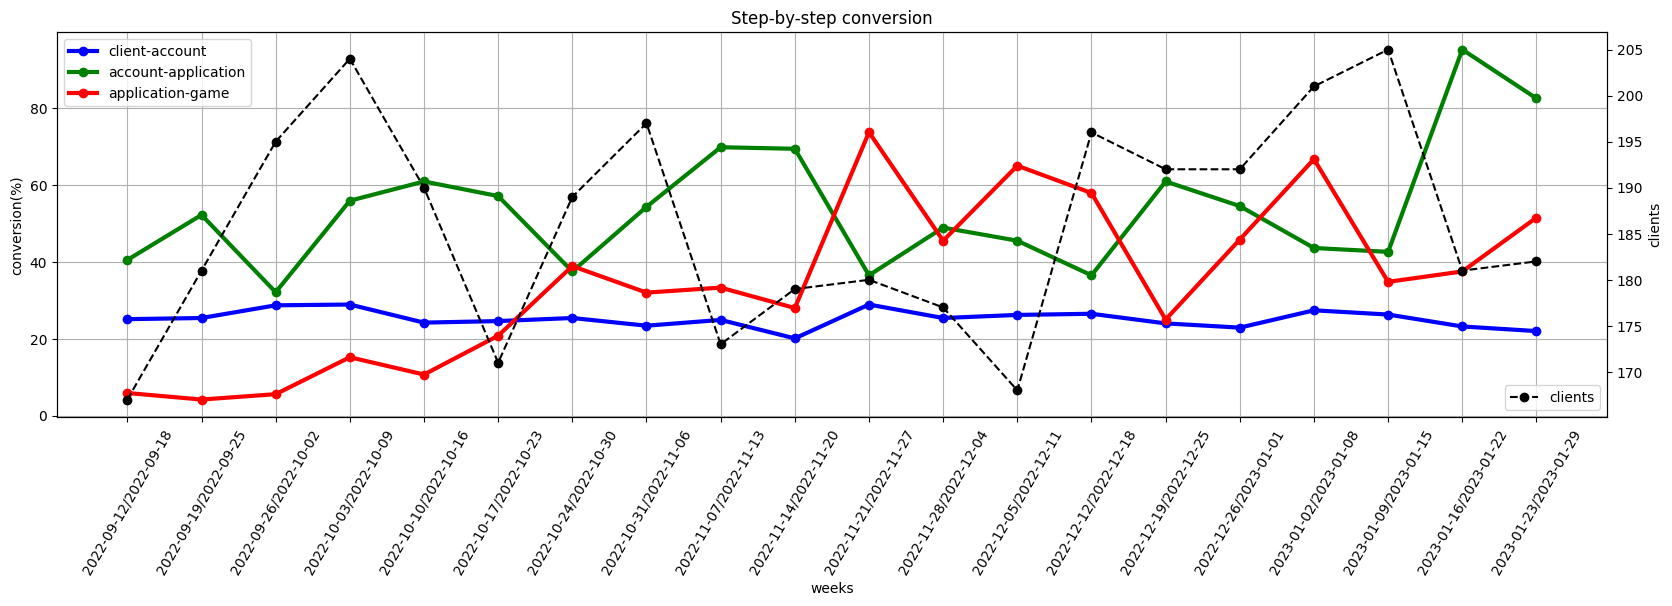

In [351]:
#Недельная динамика

fig, ax = plt.subplots(figsize=(20, 5))

ax.plot(week_df["week"], week_df['client-account(%)'], color='b', marker='o', linewidth=3)
ax.plot(week_df["week"], week_df['account-application(%)'], color='g', marker='o', linewidth=3)
ax.plot(week_df["week"], week_df['application-game(%)'], color='r', marker='o', linewidth=3)

plt.xticks(week_df["week"], rotation=60, fontsize=10)
ax.set_xlabel('weeks')
ax.set_ylabel('conversion(%)')
ax.set_title("Step-by-step conversion")
ax.legend(['client-account', 'account-application', 'application-game'])
ax.grid()

ax2 = ax.twinx()
ax2.plot(week_df["week"], week_df["client"], linestyle='--', color='k', marker='o')
ax2.set_ylabel('clients')
ax2.legend(['clients'], loc='lower right')

plt.show()

Выводы:

Доля клиентов-посетителей сайта, зарегистрировавших аккаунты, практически не меняется как в месячной динамике, так и в недельной. До конца 2022 года высокими темпами росла доля состоявшихся игр от числа поданных заявок (на 10-20% в месяц), однако в январе 2023 года этот показатель незначительно снизился. Доля зарегистрированных аккаунтов, с которых была подана заявку на игру, выросла более чем на 25% (с 25% до 60%+) с сентября 2022 года по январь 2023 года включительно.

#### Шаг №3. Расчёт конверсии первого этапа (количество посетителей сайта) ко всем остальным этапам

In [325]:
#Месячная динамика

#Конверсии количества посетителей сайта к количеству регистраций и к количеству посетителей игр уже есть в таблице. Остаётся добавить 1 столбец:
month_df['client-application(%)'] = round(month_df['application']/month_df['client']*100, 1)

month_df

,month,client,account,application,game,win_rate(%),client-account(%),account-application(%),application-game(%),client-application(%)
0,2022-09,778,186,63,2,0.3,23.9,33.9,3.2,8.1
1,2022-10,843,219,109,21,2.5,26.0,49.8,19.3,12.9
2,2022-11,786,195,107,43,5.5,24.8,54.9,40.2,13.6
3,2022-12,805,200,97,47,5.8,24.8,48.5,48.5,12.0
4,2023-01,852,215,133,63,7.4,25.2,61.9,47.4,15.6


In [326]:
#Недельная динамика

week_df['client-application(%)'] = round(week_df['application']/week_df['client']*100, 1)

week_df.head()

,week,client,account,application,game,win_rate(%),client-account(%),account-application(%),application-game(%),client-application(%)
0,2022-09-12/2022-09-18,167,42,17,1,0.6,25.1,40.5,5.9,10.2
1,2022-09-19/2022-09-25,181,46,24,1,0.6,25.4,52.2,4.2,13.3
2,2022-09-26/2022-10-02,195,56,18,1,0.5,28.7,32.1,5.6,9.2
3,2022-10-03/2022-10-09,204,59,33,5,2.5,28.9,55.9,15.2,16.2
4,2022-10-10/2022-10-16,190,46,28,3,1.6,24.2,60.9,10.7,14.7


Визуализация конверсии первого этапа (количество посетителей сайта) ко всем остальным этапам

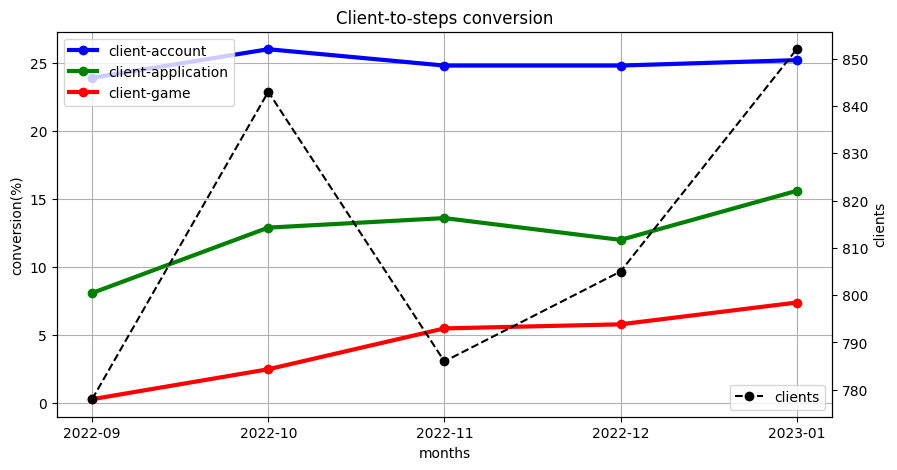

In [357]:
#Месячная динамика

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(month_df["month"], month_df['client-account(%)'], color='b', marker='o', linewidth=3)
ax.plot(month_df["month"], month_df['client-application(%)'], color='g', marker='o', linewidth=3)
ax.plot(month_df["month"], month_df['win_rate(%)'], color='r', marker='o', linewidth=3)

ax.set_xlabel('months')
ax.set_ylabel('conversion(%)')
ax.set_title("Client-to-steps conversion")
ax.legend(['client-account', 'client-application', 'client-game'], loc='upper left')
ax.grid()

ax2 = ax.twinx()
ax2.plot(month_df["month"], month_df["client"], linestyle='--', color='k', marker='o')
ax2.set_ylabel('clients')
ax2.legend(['clients'], loc='lower right')

plt.show()

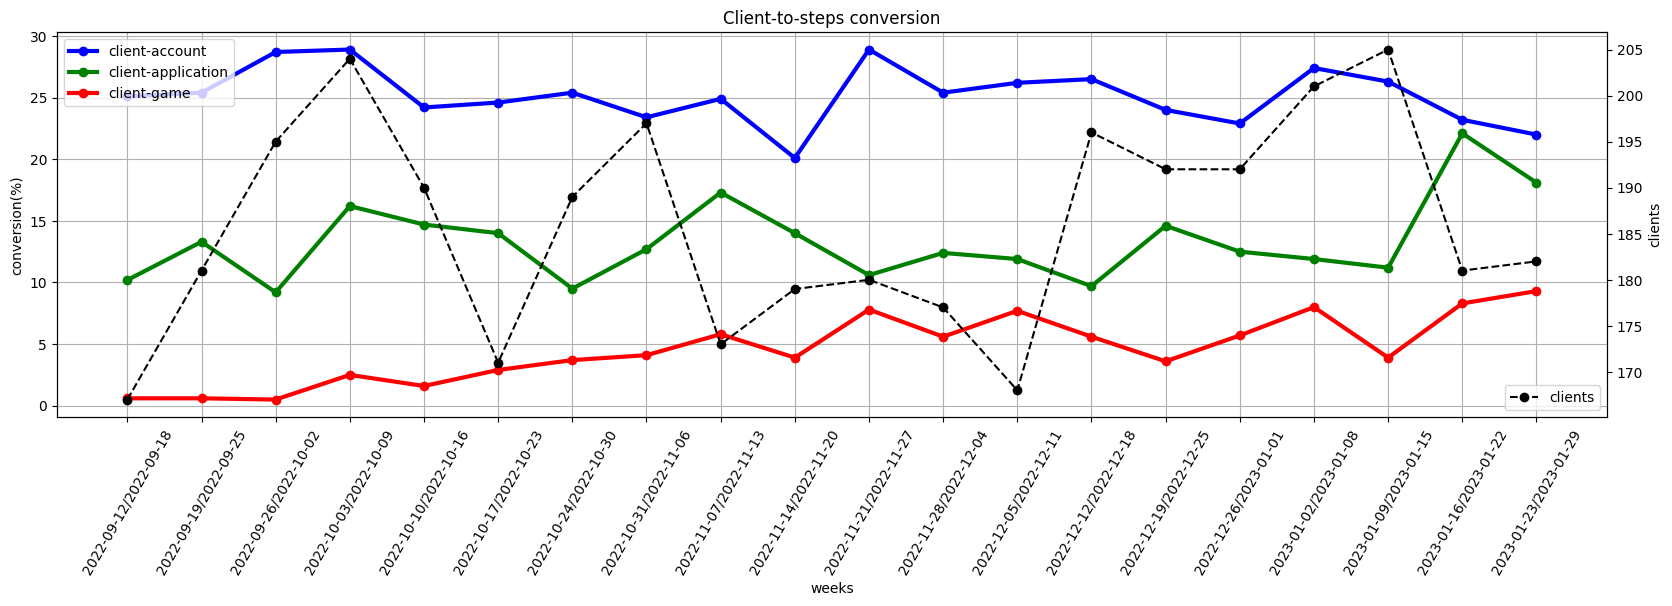

In [358]:
#Недельная динамика

fig, ax = plt.subplots(figsize=(20, 5))

ax.plot(week_df["week"], week_df['client-account(%)'], color='b', marker='o', linewidth=3)
ax.plot(week_df["week"], week_df['client-application(%)'], color='g', marker='o', linewidth=3)
ax.plot(week_df["week"], week_df['win_rate(%)'], color='r', marker='o', linewidth=3)

plt.xticks(week_df["week"], rotation=60, fontsize=10)
ax.set_xlabel('weeks')
ax.set_ylabel('conversion(%)')
ax.set_title("Client-to-steps conversion")
ax.legend(['client-account', 'client-application', 'client-game'], loc='upper left')
ax.grid()

ax2 = ax.twinx()
ax2.plot(week_df["week"], week_df["client"], linestyle='--', color='k', marker='o')
ax2.set_ylabel('clients')
ax2.legend(['clients'], loc='lower right')

plt.show()

Выводы:

Показатель конверсии посетителей сайта в число поданных заявок на игры, показал лишь умеренный рост за время существования проекта — около 5%.


Предлагаемые точки роста продукта:

1) Повысить долю зарегистрировавших аккаунты посетителей сайта (client-account). Как было показано на графике поэтапной конверсии (Шаг №2), этот показатель практически не меняется со временем — регистрируются лишь около 25% клиентов. Необходимо проанализировать сайт проекта и внедрить инструменты, которые сделают регистрацию более простой и/или привлекательной.

2) Проработать меры, которые позволят сохранить тенденцию стабильного роста доли клиентов, оставивших заявку, от числа пришедших на игру клиентов (application-game). В январе рост показателя сменился его снижением, сейчас этот этап проходит около 50% клиентов — это вызывает простои локаций для квестов. Одна из предлагаемых мер — сильнее налаживать контакт с клиентом, оставившим заявку, до его момента появления на игре: например, ввести систему напоминаний в звонках или мессенджерах.